In [ ]:
Has code from 

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
data = pd.read_csv("../feature_extraction/dataForHarmonicAudio.csv",usecols=lambda column: column != 'filename')

In [3]:
data.head()

,chroma_C,chroma_Csharp,chroma_D,chroma_Dsharp,chroma_E,chroma_F,chroma_Fsharp,chroma_G,chroma_Gsharp,chroma_A,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,genre
0,0.391512,0.429697,0.524729,0.385698,0.366340,0.433856,0.445597,0.593311,0.438685,0.413015,...,0.164212,2.695709,1.318642,0.632315,0.957001,-1.566437,6.275709,7.807974,6.363476,pop
1,0.544175,0.420254,0.424198,0.399732,0.300949,0.312941,0.363381,0.445987,0.342582,0.325424,...,5.130442,6.827752,3.071533,3.366904,-2.422404,-2.135466,-3.336569,-0.564991,-3.893568,pop
2,0.344232,0.477342,0.461315,0.383294,0.430534,0.360271,0.595679,0.406584,0.354102,0.464613,...,1.111607,-2.048577,-4.366745,-3.732610,-3.398216,2.417332,1.289159,7.578645,4.909898,pop
3,0.392071,0.428158,0.523789,0.385555,0.366227,0.433113,0.444056,0.591267,0.437267,0.413407,...,0.235207,2.670471,1.338333,0.699207,1.112011,-1.565463,6.195435,7.648764,6.243628,pop
4,0.396111,0.442692,0.408399,0.486187,0.353345,0.326342,0.372000,0.300399,0.334868,0.334352,...,-0.269821,-1.642580,-4.781828,-3.302547,-4.714705,-3.559506,-3.702941,-4.042264,0.333003,pop


In [25]:
X = data.iloc[:, :-1]  # the last column is the label
y = data.iloc[:, -1]  # the label

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [27]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Random Forest

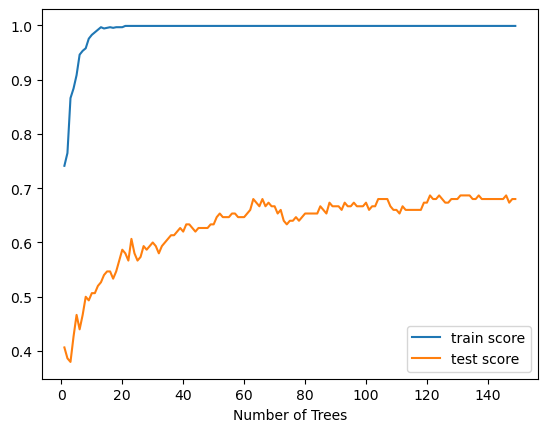

In [84]:
train_scores = np.zeros(0)
test_scores = np.zeros(0)

for i in range(1,150):
    random_forest = RandomForestClassifier(n_estimators=i,max_depth=10,random_state=42)
    random_forest.fit(X_train,y_train)
    train_scores = np.hstack([train_scores, random_forest.score(X_train,y_train)])
    test_scores = np.hstack([test_scores, random_forest.score(X_test,y_test)])
    
ax = sns.lineplot(x=range(1,150),y=train_scores,label="train score")
sns.lineplot(x=range(1,150),y=test_scores,label="test score")
plt.xlabel('Number of Trees')
plt.legend()
plt.show()

In [86]:
from sklearn.model_selection import GridSearchCV

randomForestParams = {
    'n_estimators': [i for i in range(5, 151, 5)]
}

RFC = RandomForestClassifier()
RFCGridSearch = GridSearchCV(RFC, randomForestParams, cv=5, scoring='accuracy')
RFCGridSearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                                          55, 60, 65, 70, 75, 80, 85, 90, 95,
                                          100, 105, 110, 115, 120, 125, 130,
                                          135, 140, 145, 150]},
             scoring='accuracy')

In [87]:
print("Best params:")
print(RFCGridSearch.best_params_)

Best params:
{'n_estimators': 115}


In [96]:
mappingGenresToIntegers = {
    'pop': 0,
    'metal': 1,
    'disco': 2,
    'blues': 3,
    'reggae': 4,
    'classical': 5,
    'rock': 6,
    'hiphop': 7,
    'country': 8,
    'jazz': 9
}


dfWithGenresMappedToInts = data.copy()
dfWithGenresMappedToInts['genre'] = dfWithGenresMappedToInts['genre'].map(mappingGenresToIntegers)

dfWithGenresMappedToInts.head()

,chroma_C,chroma_Csharp,chroma_D,chroma_Dsharp,chroma_E,chroma_F,chroma_Fsharp,chroma_G,chroma_Gsharp,chroma_A,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,genre
0,0.391512,0.429697,0.524729,0.385698,0.366340,0.433856,0.445597,0.593311,0.438685,0.413015,...,0.164212,2.695709,1.318642,0.632315,0.957001,-1.566437,6.275709,7.807974,6.363476,0
1,0.544175,0.420254,0.424198,0.399732,0.300949,0.312941,0.363381,0.445987,0.342582,0.325424,...,5.130442,6.827752,3.071533,3.366904,-2.422404,-2.135466,-3.336569,-0.564991,-3.893568,0
2,0.344232,0.477342,0.461315,0.383294,0.430534,0.360271,0.595679,0.406584,0.354102,0.464613,...,1.111607,-2.048577,-4.366745,-3.732610,-3.398216,2.417332,1.289159,7.578645,4.909898,0
3,0.392071,0.428158,0.523789,0.385555,0.366227,0.433113,0.444056,0.591267,0.437267,0.413407,...,0.235207,2.670471,1.338333,0.699207,1.112011,-1.565463,6.195435,7.648764,6.243628,0
4,0.396111,0.442692,0.408399,0.486187,0.353345,0.326342,0.372000,0.300399,0.334868,0.334352,...,-0.269821,-1.642580,-4.781828,-3.302547,-4.714705,-3.559506,-3.702941,-4.042264,0.333003,0


In [98]:
X_withInts = dfWithGenresMappedToInts.iloc[:, :-1]
y_withInts = dfWithGenresMappedToInts.iloc[:, -1]

X_train_withInts, X_test_withInts, y_train_withInts, y_test_withInts = train_test_split(X_withInts, y_withInts, test_size = 0.15, random_state = 42)

In [99]:
randomForestParams = {
    'n_estimators': [i for i in range(60, 140, 10)],
    'max_depth': [1, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1, 10, 20, 30],
}

RFC2 = RandomForestClassifier()
RFCGridSearch2 = GridSearchCV(RFC2, randomForestParams, cv=5, scoring='accuracy')
RFCGridSearch2.fit(X_train_withInts, y_train_withInts)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 10, 20, 30],
                         'max_features': [1, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [60, 70, 80, 90, 100, 110, 120, 130]},
             scoring='accuracy')

In [101]:
from sklearn.metrics import accuracy_score, roc_auc_score

bestRFC = RFCGridSearch2.best_estimator_

bestRFCPreds = bestRFC.predict(X_test_withInts)
print("RFC Accuracy Score:")
print(accuracy_score(y_test_withInts, bestRFCPreds))

print("RFC ROC AUC:")
print(roc_auc_score(y_test_withInts, bestRFCPreds))

print("Best params:")
print(RFCGridSearch.best_params_)

RFC Accuracy Score:
0.6466666666666666
RFC ROC AUC:


ValueError: multi_class must be in ('ovo', 'ovr')

Best was number of trees 8

In [29]:
random_forest = RandomForestClassifier(n_estimators=8,max_depth=10,random_state=67)
random_forest.fit(X_train,y_train)
random_forest.score(X_test,y_test)

0.6266666666666667

In [37]:
oneHotEncodingOfGenre = pd.get_dummies(data['genre'])
dfWithOneHotEncoding = data.copy()
dfWithOneHotEncoding.drop(columns=['genre'], inplace=True)

dfWithOneHotEncoding = pd.concat([dfWithOneHotEncoding, oneHotEncodingOfGenre], axis=1)
dfWithOneHotEncoding.head()

,chroma_C,chroma_Csharp,chroma_D,chroma_Dsharp,chroma_E,chroma_F,chroma_Fsharp,chroma_G,chroma_Gsharp,chroma_A,...,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
0,0.391512,0.429697,0.524729,0.385698,0.366340,0.433856,0.445597,0.593311,0.438685,0.413015,...,False,False,False,False,False,False,False,True,False,False
1,0.544175,0.420254,0.424198,0.399732,0.300949,0.312941,0.363381,0.445987,0.342582,0.325424,...,False,False,False,False,False,False,False,True,False,False
2,0.344232,0.477342,0.461315,0.383294,0.430534,0.360271,0.595679,0.406584,0.354102,0.464613,...,False,False,False,False,False,False,False,True,False,False
3,0.392071,0.428158,0.523789,0.385555,0.366227,0.433113,0.444056,0.591267,0.437267,0.413407,...,False,False,False,False,False,False,False,True,False,False
4,0.396111,0.442692,0.408399,0.486187,0.353345,0.326342,0.372000,0.300399,0.334868,0.334352,...,False,False,False,False,False,False,False,True,False,False


In [44]:
mappingGenresToIntegers = {
    'pop': 0,
    'metal': 1,xs
    'disco': 2,
    'blues': 3,
    'reggae': 4,
    'classical': 5,
    'rock': 6,
    'hiphop': 7,
    'country': 8,
    'jazz': 9
}


dfWithGenresMappedToInts = data.copy()
dfWithGenresMappedToInts['genre'] = dfWithGenresMappedToInts['genre'].map(mappingGenresToIntegers)

dfWithGenresMappedToInts.head()

,chroma_C,chroma_Csharp,chroma_D,chroma_Dsharp,chroma_E,chroma_F,chroma_Fsharp,chroma_G,chroma_Gsharp,chroma_A,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,genre
0,0.391512,0.429697,0.524729,0.385698,0.366340,0.433856,0.445597,0.593311,0.438685,0.413015,...,0.164212,2.695709,1.318642,0.632315,0.957001,-1.566437,6.275709,7.807974,6.363476,0
1,0.544175,0.420254,0.424198,0.399732,0.300949,0.312941,0.363381,0.445987,0.342582,0.325424,...,5.130442,6.827752,3.071533,3.366904,-2.422404,-2.135466,-3.336569,-0.564991,-3.893568,0
2,0.344232,0.477342,0.461315,0.383294,0.430534,0.360271,0.595679,0.406584,0.354102,0.464613,...,1.111607,-2.048577,-4.366745,-3.732610,-3.398216,2.417332,1.289159,7.578645,4.909898,0
3,0.392071,0.428158,0.523789,0.385555,0.366227,0.433113,0.444056,0.591267,0.437267,0.413407,...,0.235207,2.670471,1.338333,0.699207,1.112011,-1.565463,6.195435,7.648764,6.243628,0
4,0.396111,0.442692,0.408399,0.486187,0.353345,0.326342,0.372000,0.300399,0.334868,0.334352,...,-0.269821,-1.642580,-4.781828,-3.302547,-4.714705,-3.559506,-3.702941,-4.042264,0.333003,0


In [68]:
from sklearn.preprocessing import MinMaxScaler

minMaxScaler = MinMaxScaler()
X_train_minMaxScaled = minMaxScaler.fit_transform(X_train)
X_test_minMaxScaled = minMaxScaler.transform(X_test)

In [69]:
rf_model = RandomForestClassifier(n_estimators=8,max_depth=10,random_state=67)
rf_model.fit(X_train_minMaxScaled,y_train)
rf_model.score(X_test_minMaxScaled,y_test)

0.6266666666666667

In [70]:
from sklearn.feature_selection import SelectKBest, chi2

k_selected = []
scores = []
for i in range (5, 45, 5):
    selector = SelectKBest(chi2, k=i)
    X_train_selected = selector.fit_transform(X_train_minMaxScaled, y_train)
    X_test_selected = selector.transform(X_test_minMaxScaled)
    
    rf_model_kselected = RandomForestClassifier(n_estimators=8,max_depth=10,random_state=67)
    rf_model_kselected.fit(X_train_selected, y_train)
    
    k_selected.append(i)
    scores.append(rf_model_kselected.score(X_test_selected,y_test))

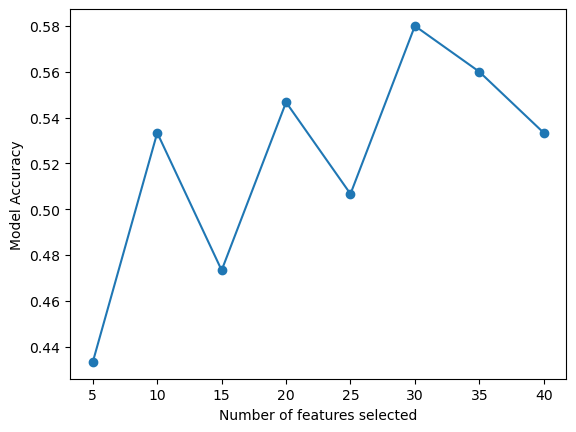

In [71]:
plt.plot(k_selected, scores, marker='o')
plt.xlabel('Number of features selected')
plt.ylabel('Model Accuracy')
plt.show()

Text(0.5, 1.0, 'From 30 top features')

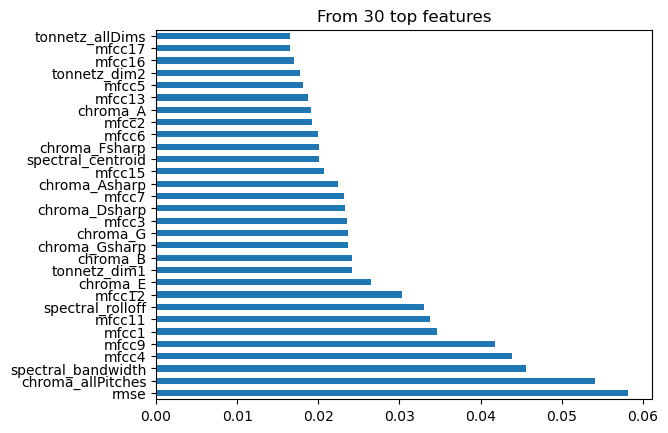

In [72]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.title('From 30 top features')

Text(0.5, 1.0, 'From 30 selected features')

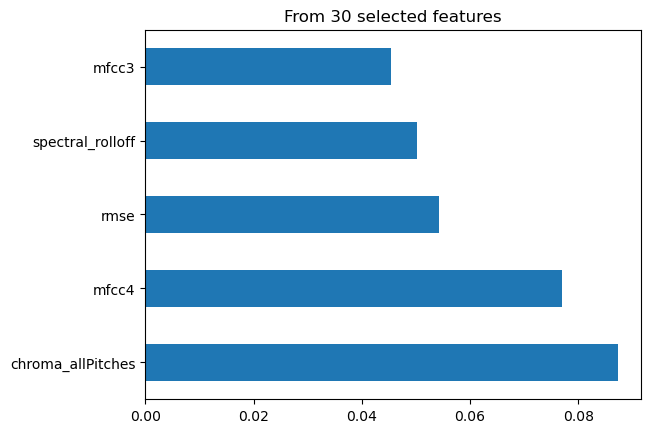

In [76]:
selector30 = SelectKBest(chi2, k=30)


X_train_30 = selector30.fit_transform(X_train_minMaxScaled, y_train)
X_test_30 = selector30.transform(X_test_minMaxScaled)

features_30_selected_indices = selector30.get_support(indices=True)
features_30_df = X.iloc[:, features_30_selected_indices]

    
rf30 = RandomForestClassifier(n_estimators=5,max_depth=10,random_state=67)
rf30.fit(X_train_30, y_train)


feat_importances = pd.Series(rf30.feature_importances_, index=features_30_df.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title('From 30 selected features')

In [ ]:
randomForestParams = {
    'n_estimators': [50, 100, 150],
    'max_depth': [1, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1, 10, 20, 30],
}

RFC = RandomForestClassifier()
RFCGridSearch = GridSearchCV(RFC, randomForestParams, cv=5, scoring='accuracy')
RFCGridSearch.fit(X_train, y_train)

Kaggle - 4

In [ ]:
plotHistory(model_1_history)


In [ ]:
import tensorflow as tf
print("TF version:-", tf.__version__)
import keras as k
tf.random.set_seed(seed)




ACCURACY_THRESHOLD = 0.94

class myCallback(k.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > ACCURACY_THRESHOLD):
            print("\n\nStopping training as we have reached %2.2f%% accuracy!" %(ACCURACY_THRESHOLD*100))   
            self.model.stop_training = True

def trainModel(model, epochs, optimizer):
    batch_size = 128
    callback = myCallback()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics='accuracy'
    )
    return model.fit(X_train, y_train, validation_data=(X_dev, y_dev), epochs=epochs, 
                     batch_size=batch_size, callbacks=[callback])

def plotHistory(history):
    print("Max. Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()
    
    
model_1 = k.models.Sequential([
    k.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dense(128, activation='relu'),
    k.layers.Dense(64, activation='relu'),
    k.layers.Dense(10, activation='softmax'),
])

print(model_1.summary())
model_1_history = trainModel(model=model_1, epochs=70, optimizer='adam')